In [1]:
import seaborn as sb
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd
from ggplot import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 22}

matplotlib.rc('font', **font)

d:\python\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
d:\python\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
d:\python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('randomselection.csv',encoding='utf-8')
del df[df.columns[0]]


In [3]:
df.head()

,Name,Studio,Episodes,Genres,Source,Type,Score,Members,Season,Year
0,Patalliro!,Toei Animation,49,"[Adventure, Comedy, Romance, Shoujo, Shounen Ai]",Manga,TV,7.62,"2,748",Spring,1982
1,Mahou no Princess Minky Momo,Production Reed,63,"[Magic, Shoujo]",Original,TV,6.77,"2,524",Spring,1982
2,Kikou Kantai Dairugger XV,Toei Animation,52,"[Action, Adventure, Mecha, Sci-Fi, Shounen]",-,TV,6.56,"1,228",Spring,1982
3,Ochamegami Monogatari: Korokoro Pollon,-,46,"[Parody, Magic, Comedy]",Manga,TV,7.13,"1,169",Spring,1982
4,Tezuka Osamu no Don Dracula,-,8,"[Comedy, Horror, Supernatural, Vampire]",Manga,TV,6.38,"1,057",Spring,1982


C:\Users\Caleb\AppData\Roaming\Python\Python27\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


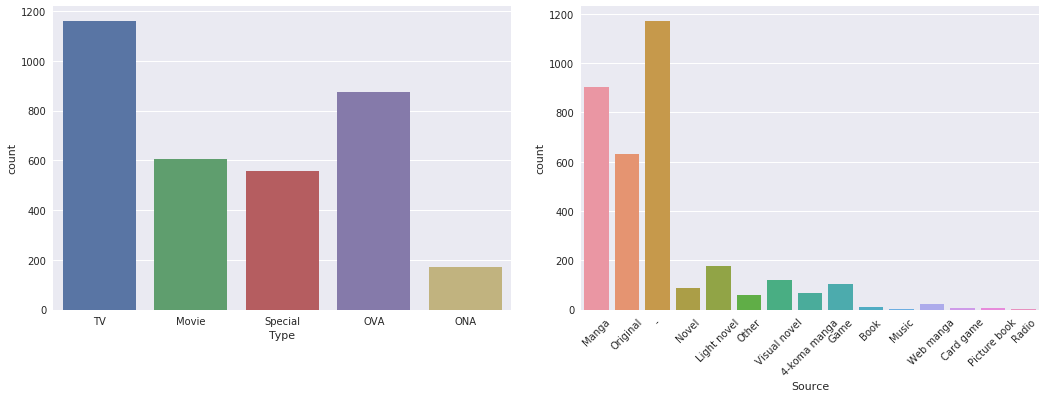

In [4]:
fig, axs = plt.subplots(ncols=2,figsize=(15,6))
sb.countplot(x=df.Type, data = df,ax=axs[0])
g1=sb.countplot(x=df.Source,data = df, ax=axs[1])
plt.setp(g1.get_xticklabels(),rotation = 45,fontsize=10)
plt.tight_layout()

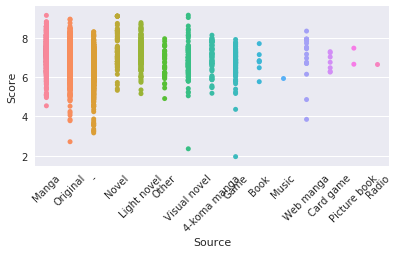

In [5]:
g = sb.stripplot(x=df.Source,y=df.Score,data=df)
plt.setp(g.get_xticklabels(),rotation=45)
plt.tight_layout()

Filling in nan values with the mean of the score

In [6]:
df.Score =  df.Score.fillna(np.mean(df.Score))

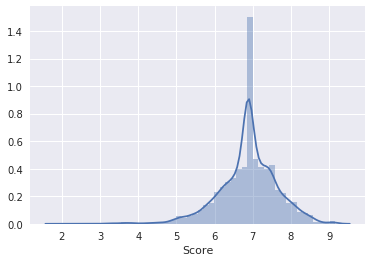

In [7]:
sb.distplot(df.Score)

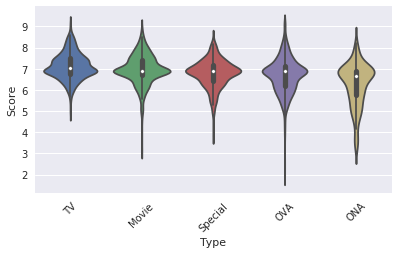

In [8]:
g = sb.violinplot(x=df.Type,y=df.Score,data=df)
plt.setp(g.get_xticklabels(),rotation=45)
plt.tight_layout()

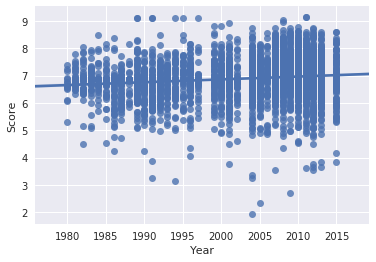

In [9]:
sb.regplot(x=df.Year,y=df.Score)

In [10]:
pearsonr(df.Year,df.Score)

(0.13043835662206629, 2.8937587347901562e-14)

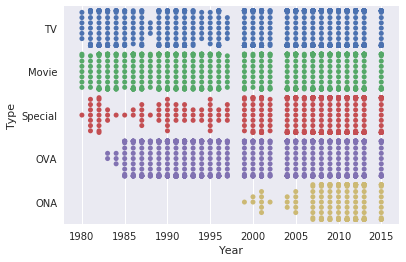

In [14]:
sb.swarmplot(x=df.Year,y=df.Type)

In [18]:
df.Year.corr(df.Score)

0.13043835662206632

In [33]:
df.Members = df.Members.apply(lambda x: float(x.replace(',','')) )

In [35]:
df.Score.corr(df.Members)

0.4305594082827533

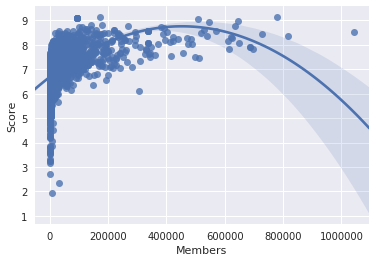

In [38]:
sb.regplot(df.Members,df.Score,order=2)

ValueError: bottom cannot be >= top

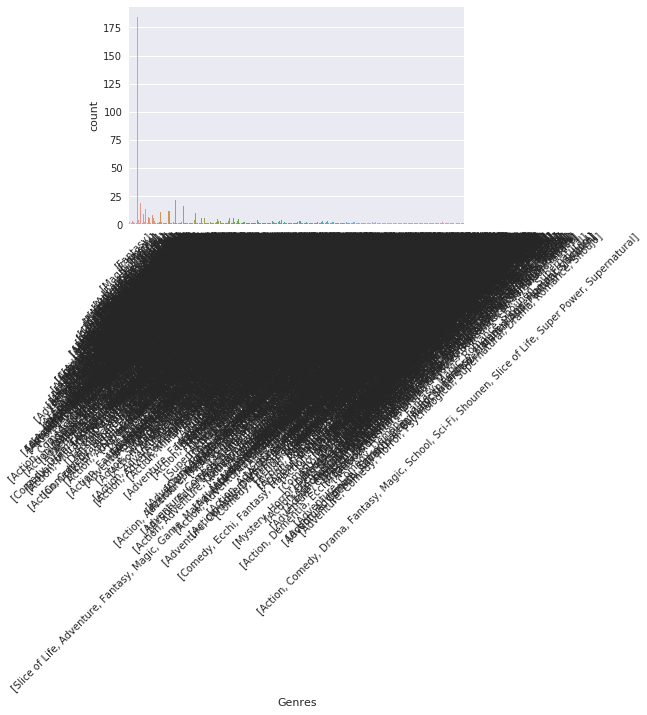

In [39]:
g = sb.countplot(df.Genres)
plt.setp(g.get_xticklabels(),rotation=45)
plt.tight_layout()

In [60]:
genres = set()
for k in df.Genres:
    for g in k[1:-1].split(','):
        genres.add(g.strip())

In [61]:
genres.pop()

u''

In [66]:
genres
[k for k in genres.]

[u'Police',
 u'Sci-Fi',
 u'Space',
 u'Vampire',
 u'Demons',
 u'Sports',
 u'Romance',
 u'Supernatural',
 u'Comedy',
 u'Harem',
 u'Josei',
 u'Fantasy',
 u'Slice of Life',
 u'Cars',
 u'Horror',
 u'Game',
 u'Shoujo',
 u'Adventure',
 u'Shounen Ai',
 u'Ecchi',
 u'Thriller',
 u'Mystery',
 u'School',
 u'Magic',
 u'Drama',
 u'Samurai',
 u'Historical',
 u'Action',
 u'Military',
 u'Parody',
 u'Seinen',
 u'Shounen',
 u'Psychological',
 u'Mecha',
 u'Music',
 u'Dementia',
 u'Martial Arts',
 u'Super Power',
 u'Shoujo Ai']

In [62]:
scoredf = pd.DataFrame(index=genres)
total_scores = []
for x in genres:
    scores = []
    for k in enumerate(df.Genres):
        if x in k[1]:
            scores.append(df.Score.iloc[k[0]])
        else:
            scores.append(0)
    total_scores.append(scores)
total_scores = np.array(total_scores)    

In [63]:
count_genres = []
for index, x in enumerate(total_scores):
    count_genres.append(0)
    for b in x:
        if b > 0:
            count_genres[index] += 1
genre_weights = np.array([np.average(x) for x in total_scores])

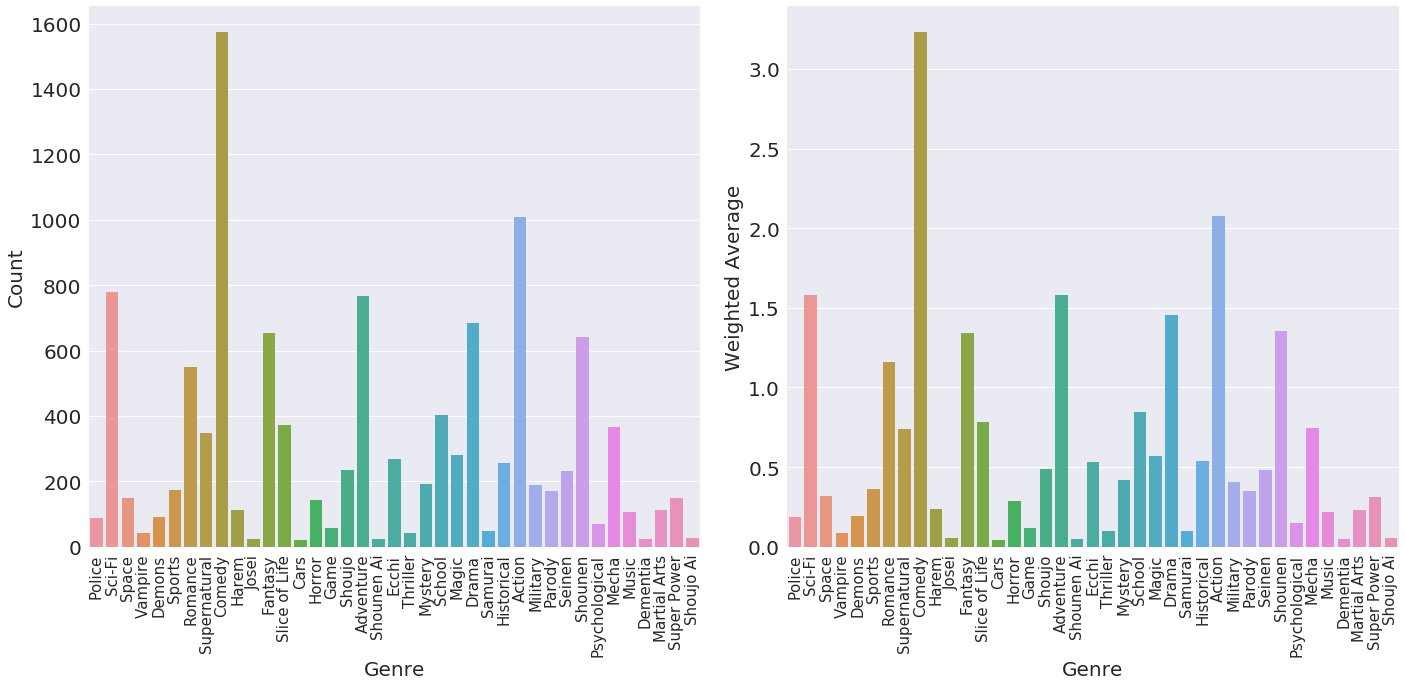

In [64]:
fig, axs = plt.subplots(ncols=2,figsize=(20,10))
g1 = sb.barplot(x=[k for k in genres],y=count_genres, ax=axs[0])
g2 = sb.barplot(x=[k for k in genres],y=genre_weights, ax=axs[1])
g1.set_ylabel('Count',fontsize=20), g2.set_ylabel('Weighted Average',fontsize=20)
for g in [g1,g2]:
    g.set_xlabel('Genre', fontsize=20)
    plt.setp(g.get_xticklabels(),rotation = 90,fontsize=15)
    plt.setp(g.get_yticklabels(),fontsize=20)

plt.tight_layout()

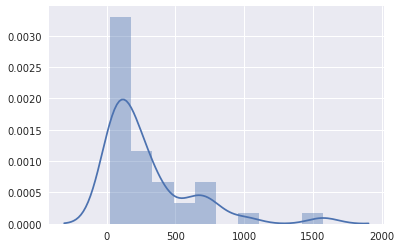

In [67]:
sb.distplot(count_genres)